In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
from os.path import join as pjoin
import os.path as osp

%matplotlib inline

In [2]:
def plot_motion(data, figsize=(16,10)):
    #plots motion params for translations and rotations
    fig = plt.figure(figsize=figsize)
    #plot translations
    ax = fig.add_subplot(1,2,1)
    ax.plot(data[:,0:3])
    plt.title('translations')
    #plot rotations
    ax = fig.add_subplot(1,2,2)
    ax.plot(data[:,3:7])
    plt.title('rotations')
    plt.suptitle('motion parameters') #plot which trajectory
    plt.show()

## display realignment parameters

In [3]:
REALIGN_PARAMS = osp.join(osp.abspath(osp.curdir), 'rp_afS46_sess2-0024-00004-000004-01.txt')
realign_params = np.loadtxt(REALIGN_PARAMS)
realign_params.shape

(270, 6)

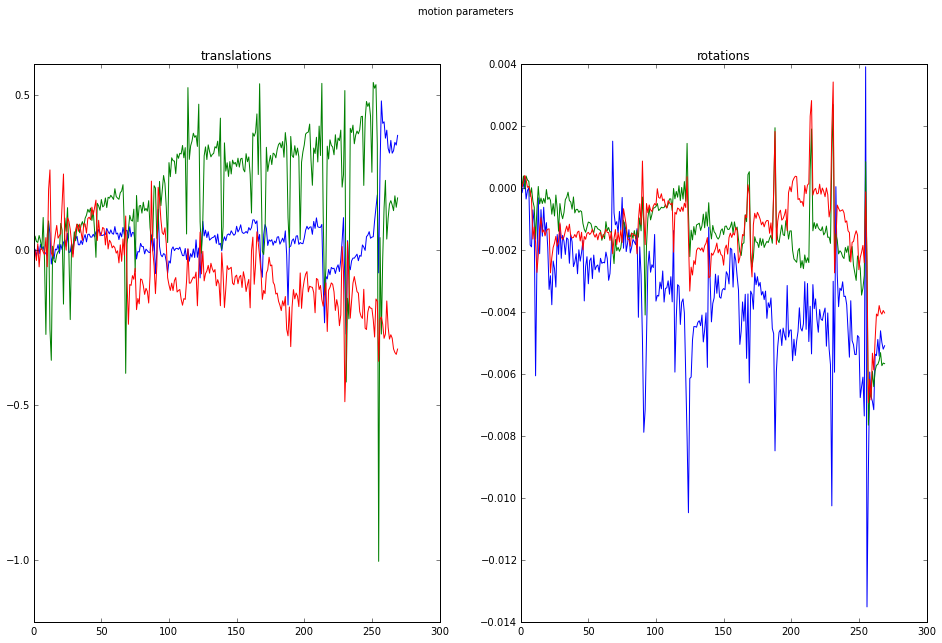

In [4]:
plot_motion(realign_params)

## interpolation with splines

In [5]:
from scipy.interpolate import interp1d
x = np.arange(0, realign_params.shape[0])
y = realign_params[:,0]
f = interp1d(x, y, kind='cubic')

slice_nb = 30
xnew = np.linspace(0,269, 270*slice_nb)
print(xnew.shape, 270*slice_nb)
print(xnew.min(), xnew.max())

ynew = f(xnew)

print(ynew.shape)

(8100,) 8100
0.0 269.0
(8100,)


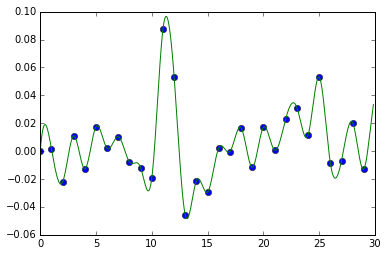

In [6]:
npts = 30
plt.plot(x[:npts], y[:npts], 'o', xnew[:npts*slice_nb], ynew[:npts*slice_nb], '-')

## block interpolation

In [7]:
def block_interp(data, block_size):
    """
    just duplicate data
    """
    
    return np.kron(data, np.ones((block_size, 1)))
    
def gradiant2degree(data):
    
    return data*180/np.pi
    

In [8]:
print(block_interp(gradiant2degree(realign_params[:3,:3]), 10))
print(gradiant2degree(realign_params[:3,:3]))

[[ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.10527859  2.53858302 -0.05172263]
 [ 0.10527859  2.53858302 -0.05172263]
 [ 0.10527859  2.53858302 -0.05172263]
 [ 0.10527859  2.53858302 -0.05172263]
 [ 0.10527859  2.53858302 -0.05172263]
 [ 0.10527859  2.53858302 -0.05172263]
 [ 0.10527859  2.53858302 -0.05172263]
 [ 0.10527859  2.53858302 -0.05172263]
 [ 0.10527859  2.53858302 -0.05172263]
 [ 0.10527859  2.53858302 -0.05172263]
 [-1.27709812  1.52869168 -1.97458898]
 [-1.27709812  1.52869168 -1.97458898]
 [-1.27709812  1.52869168 -1.97458898]
 [-1.27709812  1.52869168 -1.97458898]
 [-1.27709812  1.52869168 -1.97458898]
 [-1.27709812  1.52869168

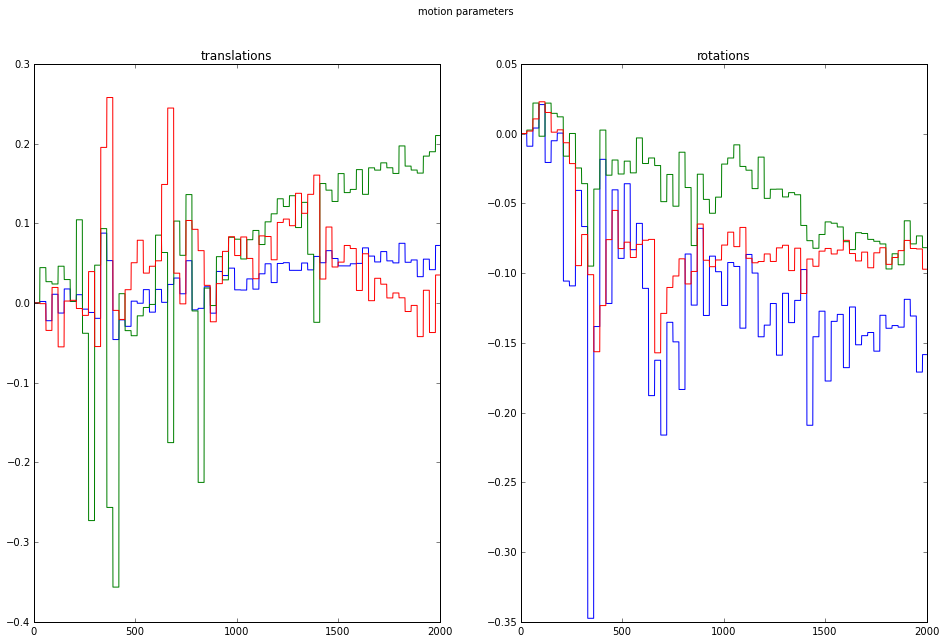

In [9]:

out_fname = osp.join(osp.abspath(osp.curdir), 'rp_afS46_sess2-0024-00004-000004-01' \
                                                                 + '-iblock' + '.txt')
new_data = np.hstack((realign_params[:,:3], gradiant2degree(realign_params[:,3:])))

new_data = block_interp(new_data, slice_nb)

plot_motion(new_data[:2000,:])

# np.savetxt(out_fname, new_data)


In [10]:
import scipy.signal as ssig

def convolve_2darr(arr, kernel, mode='same'):
    """
    """
    returned_arr = arr.T.copy()
    assert arr.ndim == 2
    
    for idx, sig in enumerate(arr.T):
        returned_arr[idx] = ssig.convolve(sig, kernel, mode=mode)
       
    return returned_arr.T

In [11]:
new_data.ndim

2

In [12]:
kernel = ssig.gaussian(10, 1.5)/ssig.gaussian(10, 1.2).sum() 
data_convolved = convolve_2darr(new_data, kernel)

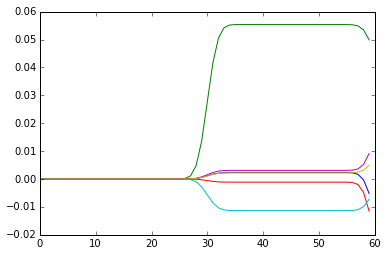

In [13]:
_  = plt.plot(data_convolved[:60,:])

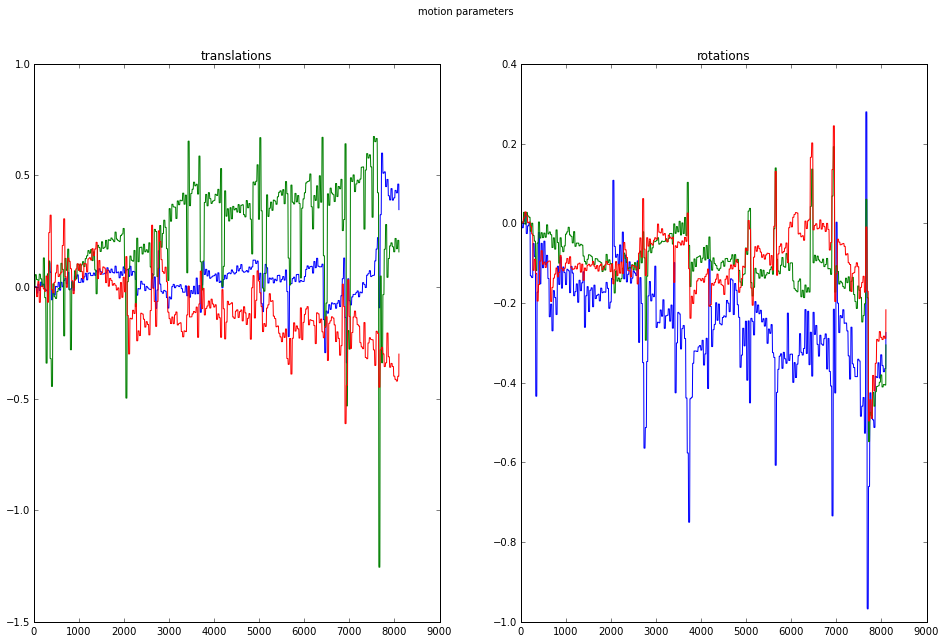

[-0.33969208 -1.25546069 -0.61216052 -0.96756495 -0.54802919 -0.49631668] [ 0.59997055  0.6744129   0.32190506  0.27936705  0.19216374  0.24429156]


In [14]:
plot_motion(data_convolved)
print(data_convolved.min(axis=0), data_convolved.max(axis=0))

In [15]:
np.savetxt(out_fname, data_convolved)

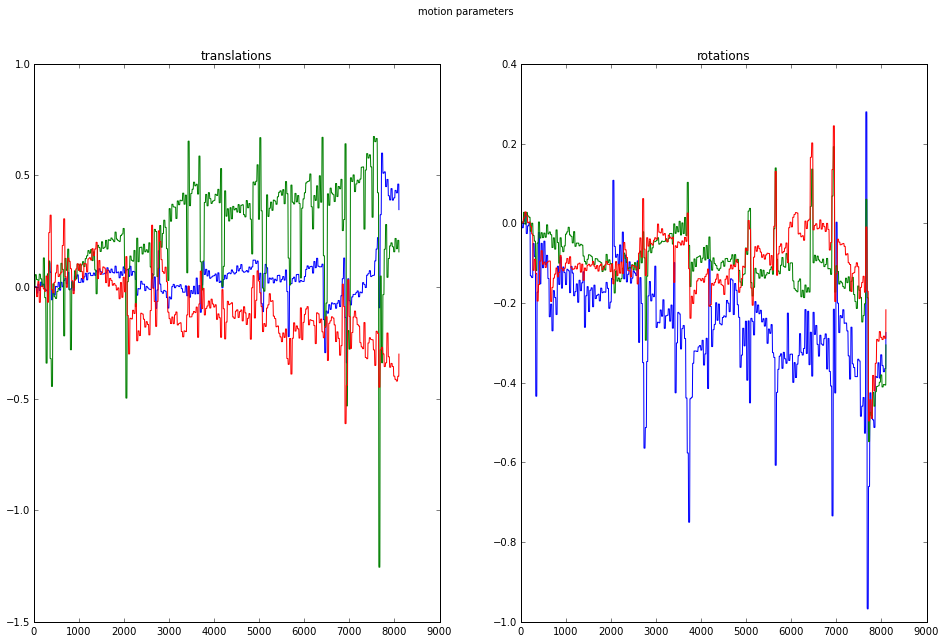

In [17]:
plot_motion(np.loadtxt(out_fname))

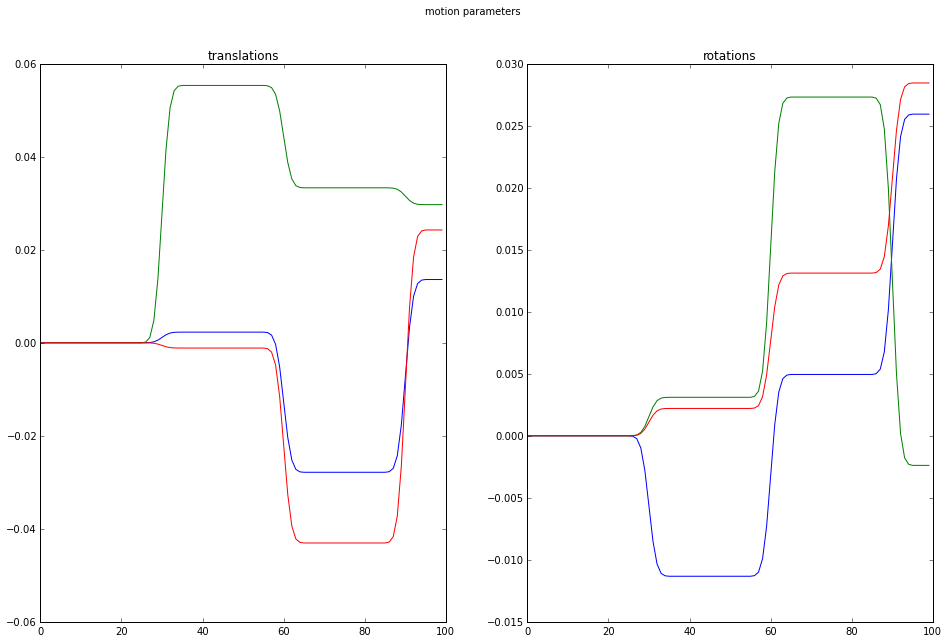

In [16]:
plot_motion(np.loadtxt(out_fname)[:100,:])


In [18]:
20*30


600